In [3]:
import os
import torch
th = torch
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from random import randint
InteractiveShell.ast_node_interactivity = "all"
torch.set_printoptions(precision=3, sci_mode=False)

# LOAD DATASET

In [4]:
import pickle
dfs = pickle.load(open('real_companies_data.pkl', 'rb'))

In [5]:
dfs.keys()

dict_keys(['tesla', 'apple'])

In [7]:
dfs['tesla']

,close,close_nasdaq_composite,close_sp_500,close_dow_jones,tweet
Date,,,,,
2020-01-02,0.011927,0.232898,0.338239,0.484405,
2020-01-03,0.014130,0.225444,0.330615,0.473379,
2020-01-06,0.015604,0.230736,0.334404,0.476608,@flcnhvy @slashdot 🤣🤣 @slashdot The Nirvana ba...
2020-01-07,0.018631,0.230434,0.331388,0.470966,@BnOrdhaug @Erdayastronaut I haven’t cross-che...
2020-01-08,0.022618,0.236765,0.336648,0.478574,"@nichegamer King of the Goblins,\nMaster of th..."
...,...,...,...,...,...
2024-04-08,0.385859,0.980354,0.982777,0.956891,https://t.co/gKoHxYpHPC The AI compute growth ...
2024-04-09,0.395966,0.985852,0.985270,0.956461,Accurate https://t.co/Oen5ct1aNB Much apprecia...
2024-04-10,0.382698,0.971629,0.968939,0.936562,𝕏 algorithm update coming soon with more bange...


In [8]:
pc_train = 0.2

names = list(dfs.keys())
T = len(dfs[names[0]])
n_train = int(pc_train * T)

dfs_train, dfs_test = {}, {}
for _name, _df in dfs.items():
    dfs_train[_name] = _df.iloc[:len(_df) - n_train]
    dfs_test[_name] = _df.iloc[len(_df) - n_train:]

n_train_per_company = len(dfs_train[_name])
n_test_per_company = len(dfs_test[_name])

print('# of Companies: {} | # of Price Points: {}'.format(len(names), T))
print('Companies: ')
print(names)
print('# to be assigned as train: {} | test: {}'.format(len(dfs_train[_name]), len(dfs_test[_name])))

# of Companies: 2 | # of Price Points: 1077
Companies: 
['tesla', 'apple']
# to be assigned as train: 862 | test: 215


In [9]:
dfs[_name].index.strftime('%Y-%m-%d').tolist()

['2020-01-02',
 '2020-01-03',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-06',
 '2020-04-

In [10]:
dfs_test[_name].index.strftime('%Y-%m-%d').tolist()

['2023-06-06',
 '2023-06-07',
 '2023-06-08',
 '2023-06-09',
 '2023-06-12',
 '2023-06-13',
 '2023-06-14',
 '2023-06-15',
 '2023-06-16',
 '2023-06-20',
 '2023-06-21',
 '2023-06-22',
 '2023-06-23',
 '2023-06-26',
 '2023-06-27',
 '2023-06-28',
 '2023-06-29',
 '2023-06-30',
 '2023-07-03',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-19',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-26',
 '2023-07-27',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10',
 '2023-08-11',
 '2023-08-14',
 '2023-08-15',
 '2023-08-16',
 '2023-08-17',
 '2023-08-18',
 '2023-08-21',
 '2023-08-22',
 '2023-08-23',
 '2023-08-24',
 '2023-08-25',
 '2023-08-28',
 '2023-08-29',
 '2023-08-30',
 '2023-08-31',
 '2023-09-01',
 '2023-09-05',
 '2023-09-06',
 '2023-09-07',
 '2023-09-08',
 '2023-09-

# Important Parameters

In [30]:
name_stock_indices = ['close_dow_jones', 'close_sp_500', 'close_nasdaq_composite']

input_prices = ['close'] + name_stock_indices
output_prices = ['close'] 
text_column = 'tweet' #'Text'

apply_pca = 10 # only relevant when there are text embeddings

input_window = seq_length = 30  # e.g., 5 days input
output_window = 1  # e.g., 2 days to predict

## Load BERT embedder

In [31]:
# from transformers import BertTokenizer, BertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# embedder = BertModel.from_pretrained('bert-base-uncased')

from transformers import LongformerModel, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")
embedder = LongformerModel.from_pretrained("allenai/longformer-base-4096")
max_token_n = 4096

# test model
text = 'TWEETS' * 1000
encoded_input = tokenizer(text, return_tensors='pt')
print(encoded_input.input_ids.shape)
_  = embedder(**encoded_input)

torch.Size([1, 3002])


## Dataset generation methods

In [32]:
from sklearn.decomposition import PCA

class TextEmbeddingContainer(object):
    def __init__(self, dataframes, text_column=None, apply_pca=None):
        super(TextEmbeddingContainer, self).__init__()

        self.unique_embs = {}
        self.unique_embs_pca = {}
        self.apply_pca = apply_pca
        self.text_column = text_column

        if isinstance(dataframes, str):
            self.load_embeddings(dataframes)
        else:
            assert text_column is not None
            
            all_texts = [_df[text_column].values.tolist() for _key, _df in dataframes.items()]
            list_embs_p_company = self.embed_text(all_texts)

    def embed_text(self, list_list_texts):
        return embed_text(self, list_list_texts, apply_pca=self.apply_pca)

    def save_embeddings(self, file_path):
        pickle.dump([(self.text_column, self.apply_pca), self.unique_embs, self.unique_embs_pca], open(file_path, 'wb'))
    def load_embeddings(self, file_path):
        res = pickle.load(open(file_path, 'rb'))
        (self.text_column, self.apply_pca), self.unique_embs, self.unique_embs_pca = res

def embed_by_bert(text):
    _tkn = tokenizer(text, return_tensors='pt') 
    if _tkn.input_ids.shape[-1] >= max_token_n:
        _tkn = _tkn[:,:max_token_n]
    _emb = embedder(**_tkn).last_hidden_state[:,0,:].detach().to(th.float32)
    return _emb

def embed_one_by_one(list_list_texts, text_to_emb_dict, embed_func=None):
    embs = []
    for _i, _txts in enumerate(list_list_texts):
        _embs = []
        for _txt in _txts:
            if _txt in text_to_emb_dict: 
                _emb = text_to_emb_dict.get(_txt)
            else:
                _emb = embed_func(_txt)
                text_to_emb_dict[_txt] = _emb
            _embs.append(_emb)
        embs.append(_embs)
    return embs

def embed_text(dataset, list_list_texts, apply_pca=True, prepared=False):
    unique_embs = dataset.unique_embs

    list_list_embs_p_step = embed_one_by_one(list_list_texts, unique_embs, embed_by_bert)
    list_embs_p_company = [th.cat(_embs, dim=0) for _embs in list_list_embs_p_step]
    
    #print(unique_embs)

    if apply_pca is not None:
        apply_pca = {} if apply_pca is True else apply_pca
        unique_embs_pca = dataset.unique_embs_pca
        n_components = apply_pca if isinstance(apply_pca, int) else apply_pca.get('n_components', 10)

        # create concatenated embedding
        unique_embs_txts, unique_embs_vals = list(zip(*unique_embs.items()))
        unique_embs_cat = th.cat(unique_embs_vals, dim=0)

        if not prepared:
            # apply PCA
            n_components = min(n_components, len(unique_embs_txts))
            pca = PCA(n_components=n_components)
            pca.fit(unique_embs_cat.numpy())
            
            #  transform
            unique_embs_pca_cat = th.tensor(pca.transform(unique_embs_cat))
            unique_embs_pca.update(dict(zip(unique_embs.keys(), th.split(unique_embs_pca_cat, 1))))
        
        #print(unique_embs_pca)
        # recreate datastructure
        list_list_embs_p_step_pca = embed_one_by_one(list_list_texts, unique_embs_pca)
        list_embs_p_company = [th.cat(_embs, dim=0).to(th.float32) for _embs in list_list_embs_p_step_pca]

    return list_embs_p_company

In [15]:
# README: only run this in the beginning to pre-embed all text
# save, and reuse after initial run

prepared_embedding_data = TextEmbeddingContainer(dfs, text_column, apply_pca)
# prepared_embedding_data.save_embeddings('embedded_fake_data.p')

Input ids are automatically padded from 2 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 32 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 275 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 39 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 23 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 354 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 68 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 322 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 33 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 261 to 512 to be a multiple of `config.attention_

In [18]:
prepared_embedding_data.save_embeddings('embedded_real_data.p')

### Load all saved embeddings

In [33]:
prepared_embedding_data = TextEmbeddingContainer('embedded_real_data.p')

In [34]:
# all embedded text contained here
prepared_embedding_data.unique_embs_pca.keys()

dict_keys(['', '@flcnhvy @slashdot 🤣🤣 @slashdot The Nirvana baby is about a year away from turning 30', '@BnOrdhaug @Erdayastronaut I haven’t cross-checked RCS pulses with the MLI dimpling on the video, but it’s most likely the cause @webtekno Nice 🤣🤣 @Erdayastronaut Since there’s only one main engine, which gives pitch and yaw control, roll control is provided by the nitrogen attitude control thrusters @annerajb @waitbutwhy Looks like a thin, flat, round UFO on a stick. Starlink Terminal has motors to self-adjust optimal angle to view sky. Instructions are simply:\n  - Plug in socket\n  - Point at sky\nThese instructions work in either order. No training required. @RenataKonkoly @RationalEtienne Just tryin to grow my follower count on pornhub … @RationalEtienne 🔥🔥🤣🤣 @waitbutwhy DKE^DKE @flcnhvy Sprockets was amazing At Tesla Giga Shanghai NSFW!! https://t.co/1yrPyzJQGZ @tobyliiiiiiiiii At least 4 cgi irl @DonaldM38768041 Bossart was boss art! @Austen Haha this rocks!', '@nichegamer Ki

In [23]:
# see embedding corresponding to text
prepared_embedding_data.unique_embs_pca['@ronald_samuels Which isn’t easy! Too much the moral arbiter of the world Silicon Valley has become Sanctimonious Valley @flcnhvy @SpaceX Starship will be able to launch telescopes over 3X diameter of Hubble @heyfidele @ceenettech Hopefully start serving Africa early next year @DTOMnews @arstechnica @SciGuySpace Pretty much @wonderofscience Soon, it will be in tiktok @Taraustralis Oddly mesmerizing @arstechnica @SciGuySpace Haha true. Great headline. It’s quite hard to have rocket test articles not explode, as they so desperately want to! @EthicalSkeptic @techmass3 Interesting @brendan2908 @flcnhvy @HarryStoltz1 @JaneidyEve Yes @flcnhvy @HarryStoltz1 @JaneidyEve Just one. SN5 will get three. @HarryStoltz1 @JaneidyEve Static fire with Raptor hopefully later this week @JaneidyEve 4.9 bar. Kind of a softball tbh, but that’s enough to fly! @SpacePadreIsle @SpaceX Great work by SpaceX engineering! SN4 passed cryo proof! 😅 https://t.co/EJakThZRGF @EthicalSkeptic What do you make of the FT claims? https://t.co/uCI4h20oRU @ansgarjohn @alandail FT is saying current death rate is extremely unusual, but you’re saying 2017 was higher. Which is correct? https://t.co/uCI4h20oRU Snowing in Texas https://t.co/0LKwIpnoPB Cryo test underway @WolfGaming193 @NASA Dark mode makes Twitter feel like night @AmarSheth @agargmd @aginnt @LegendaryEnergy How is it considered probable if there’s no covid test? Is just a cough or high temperature enough? @NASA So dark out there @LegendaryEnergy Would be helpful to distinguish deaths caused by covid vs unrelated to covid!']

tensor([[-0.340,  0.200, -0.002,  0.135, -0.022, -0.060, -0.076, -0.011,  0.147,
          0.045]], dtype=torch.float64)

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
import pickle

#buffer = {}

class StockDataset(Dataset):
    def __init__(self, data, 
                 input_window=4, output_window=1,
                 use_transformer= False, 
                 input_prices=['close','close_dow_jones', 'close_sp_500', 'close_nasdaq_composite' ], output_prices=['close'], 
                 include_text= True, apply_pca=10, # or False
                ):
        """
        Args:
        data (filepath of saved path)
        data (list of pd.DataFrame): List of dataframes, each containing columns:
                                          'time', 'stock price', 'stock index price', 'text message'
        input_window (int): Number of timesteps in each input sequence.
        output_window (int): Number of timesteps in each target sequence.
        
        include_text(str/embedding container): prepared_embedding_data if available, otherwise... give text column name

        """
        
        self.sequences = [] # store chunks (data point)
        self.sequences_raw = []   # store a company's entire time series sequence 
        self.sequences_raw_embs = [] # store a company's entire time series sequence (text embeddings including PCA if applied)
        self.unique_embs = {}
        self.unique_embs_pca = {}
        
        self.names = []
        self.dates = []
        
        self.apply_pca = apply_pca
        
        if use_transformer:
            output_window = 1
        
        if isinstance(data, str) and os.path.exists(data):
            self.sequences, self.sequences_raw, self.sequences_raw_embs, \
            self.unique_embs, self.unique_embs_pca = pickle.load(open(data, 'rb'))
        else:
            self.input_window = input_window
            self.output_window = output_window
        
            if include_text:
                prepared = False
                if not isinstance(include_text, str):
                    # if embedding is already prepared
                    prepared = True
                    self.unique_embs, self.unique_embs_pca = include_text.unique_embs, include_text.unique_embs_pca
                    self.apply_pca = include_text.apply_pca
                    include_text = include_text.text_column 
                    
                all_texts = [_df[include_text].values.tolist() for _key, _df in data.items()]
                list_embs_p_company = self.embed_text(all_texts, prepared)

            for _i_df, (_name, df) in enumerate(data.items()):
                self.names.append(_name)
                if _i_df == 0:
                    self.dates = df.index.strftime('%Y-%m-%d').tolist()
                
                t = df[input_prices].shape[0]
                seq_in = th.tensor(df[input_prices].values).reshape(t,-1).to(th.float32)
                self.sequences_raw.append(seq_in)
                
                seq_tgt = th.tensor(df[output_prices].values).reshape(t,-1).to(th.float32)
                if include_text:
                    embs = list_embs_p_company[_i_df]
                    self.sequences_raw_embs.append(embs)

                num_sequences = t - self.input_window - self.output_window + 1

                for i in range(num_sequences):
                    input_start = i
                    input_end = i + self.input_window
                    
                    target_start = input_start + 1
                    target_end = input_end + 1

                    seq_in_ = [seq_in[input_start:input_end]]
                    if include_text:
                        seq_in_.append(embs[input_start:input_end])

                    seq_in_ = th.cat(seq_in_, dim=1)
                    seq_tgt_ = seq_tgt[target_start:target_end]
                    self.sequences.append((seq_in_, seq_tgt_, th.tensor([[_i_df, input_start, target_end]])))

    def embed_text(self, list_list_texts, prepared):
        return embed_text(self, list_list_texts, apply_pca=self.apply_pca, prepared=prepared)
    
    def save_dataset(self, filepath):
        pickle.dump([self.sequences, self.sequences_raw, self.sequences_raw_embs, 
                     self.unique_embs, self.unique_embs_pca], open(filepath, 'wb'))
        
    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        input_sequence, target_sequence, idx, = self.sequences[idx]
        return input_sequence, target_sequence, idx

    def get_sequence_from_index(self, index, embed_with_empty=False):
        i_company, i_start, _ = index.squeeze().tolist()
        seq = seq_vals = self.sequences_raw[i_company][i_start:].unsqueeze(0)
        len_seq = seq.shape[1]
        
        if self.unique_embs:
            if embed_with_empty:
                unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
                seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, len_seq, 1)
            else:
                seq_emb = self.sequences_raw_embs[i_company][i_start:].unsqueeze(0)
            seq = th.cat((seq_vals, seq_emb), dim=2)
        return seq

    def get_sequence_by_name_date(self, name, date=None, embed_with_empty=False):
        i_company = self.names.index(name)
        i_start = self.dates.index(date) if date else 0
        
        seq = seq_vals = self.sequences_raw[i_company][i_start:].unsqueeze(0)
        len_seq = seq.shape[1]
        
        if self.unique_embs:
            if embed_with_empty:
                unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
                seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, len_seq, 1)
            else:
                seq_emb = self.sequences_raw_embs[i_company][i_start:].unsqueeze(0)
            seq = th.cat((seq_vals, seq_emb), dim=2)
        return seq
        
    # def get_sequences_from_index(self, index, n_future_steps=7, input_window=30, embed_with_empty=False):
    #     i_company, i_start, _ = index.squeeze().tolist()
        
    #     seq_raw = self.sequences_raw[i_company]
    #     len_seq_raw = seq_raw.shape[0]
        
    #     seqs = []
    #     for t in range(n_future_steps):
    #         _i_start = i_start + t + 1
    #         if _i_start + input_window > len_seq_raw:
    #             break
    #         _i_end = _i_start + input_window
            
    #         seq = seq_vals = seq_raw[_i_start:_i_end].unsqueeze(0)
    
    #         if self.unique_embs:
    #             if embed_with_empty:
    #                 unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
    #                 seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, input_window, 1)
    #             else:
    #                 seq_emb = self.sequences_raw_embs[i_company][_i_start:_i_end].unsqueeze(0)
    #             seq = th.cat((seq_vals, seq_emb), dim=2)
    #         seqs.append(seq)

    #     seqs = th.cat(seqs, dim=0).unsqueeze(0)
    #     return seqs

    
    @property
    def input_dim(self):
        return self.sequences[0][0].shape[-1]
    @property
    def output_dim(self):
        return self.sequences[0][1].shape[-1]

In [36]:
# debugging tool: ignore
def reduce(x, apply=False):
    if apply:
        return th.linalg.norm(x) 
    return x
    
def inspect_model(model, save_data=False, apply_reduce=False, show_grad=True):
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"Layer: {name}")
            print("Weights:",reduce(param.data, apply_reduce))
            if isinstance(save_data, dict):
                save_data.setdefault('w', {})[name] = param.data
                save_data.setdefault('g', {})[name] = param.grad
            if show_grad:
                if param.grad is not None:
                    print("Gradients:", reduce(param.grad, apply_reduce))
                else:
                    print("Gradients: None (check if backward has been called and if the parameter requires gradients)")
            #break
            print('-'*80)


# DATASET

In [37]:
# pickle.dump(DATA, open(FILEPATH, 'wb'))

In [38]:
# DATA = pickle.load(open(FILEPATH, 'rb'))

## Fake Data (no longer valid)

In [39]:

# # Example fake data generation

# np.random.seed(42)
# data_length = 10
# df1 = pd.DataFrame({
#     'time': pd.date_range(start='1/1/2020', periods=data_length, freq='D'),
#     'price_main': np.random.rand(data_length) * 100,
#     'price_sec': np.random.rand(data_length) * 1000,
#     'text': np.random.choice(['news', '', 'alert', 'none'], data_length)
# })

# df2 = pd.DataFrame({
#     'time': pd.date_range(start='1/1/2020', periods=data_length, freq='D'),
#     'price_main': np.random.rand(data_length) * 100,
#     'price_sec': np.random.rand(data_length) * 1000,
#     'text': np.random.choice(['announcement', 'report', 'alert', 'none'], data_length)
# })

# dataframes = [df1, df2]

* you will need to replace this with your own data
* each df relates to a company
* additionally, normalise your company's price data from 0 to 1
* the stock prices should be normalised the same way across all companies
* here 'price_main' and 'price_sec' represents 'stock' and 'stock index'


## Make dataset

* the dataset generator can be used to make data for different model architecture...
* you can have it predict from stock and index price, and output in stock price... you can also include index price in the output... adjust the output_prices accordingly

In [40]:
# include_text:
# prepared_embedding_data if available, otherwise... give text column name

dataset_train = StockDataset(dfs_train, 
                             input_window, output_window, 
                             input_prices=input_prices, output_prices=output_prices, include_text= prepared_embedding_data,
                             apply_pca=apply_pca)
dataset_test = StockDataset(dfs_test, 
                            input_window, output_window, 
                            input_prices=input_prices, output_prices=output_prices, include_text= prepared_embedding_data,
                            apply_pca=apply_pca)

n_train = len(dataset_train)
n_test = len(dataset_test)
print("Dataset size (total): Train: {} & Test: {}".format(n_train, n_test))
print("Dataset size (per company): Train: {} & Test: {}".format(n_train_per_company, n_test_per_company))


Dataset size (total): Train: 1664 & Test: 370
Dataset size (per company): Train: 862 & Test: 215


In [41]:
dataset_test.unique_embs_pca is dataset_train.unique_embs_pca

True

In [42]:
dataset_train[0][0].shape

torch.Size([30, 14])

In [44]:
# example on how to get particular subsequence for date and company:
dataset_train.get_sequence_by_name_date('apple', '2020-01-03')

tensor([[[ 0.129,  0.473,  0.331,  ...,  0.070, -0.217, -0.064],
         [ 0.133,  0.477,  0.334,  ..., -0.018,  0.059, -0.114],
         [ 0.130,  0.471,  0.331,  ...,  0.070, -0.217, -0.064],
         ...,
         [ 0.873,  0.682,  0.657,  ...,  0.070, -0.217, -0.064],
         [ 0.879,  0.715,  0.678,  ...,  0.070, -0.217, -0.064],
         [ 0.870,  0.706,  0.675,  ...,  0.112,  0.049,  0.288]]])

In [45]:
# example on how to get particular subsequence based on stored index:
dataset_train.get_sequence_from_index(th.tensor([0, 5, 0])).shape

torch.Size([1, 857, 14])

In [46]:
dataset_train[1]

(tensor([[     0.014,      0.473,      0.331,      0.225,     -0.090,     -0.338,
               0.186,      0.388,     -0.012,     -0.213,      0.032,      0.070,
              -0.217,     -0.064],
         [     0.016,      0.477,      0.334,      0.231,     -0.473,     -0.318,
              -0.035,      0.259,     -0.056,     -0.010,     -0.161,      0.056,
              -0.055,     -0.028],
         [     0.019,      0.471,      0.331,      0.230,     -0.306,      0.261,
              -0.088,      0.040,     -0.038,     -0.138,     -0.113,      0.048,
              -0.017,      0.051],
         [     0.023,      0.479,      0.337,      0.237,     -0.597,     -0.372,
               0.129,      0.237,     -0.133,      0.091,     -0.212,      0.122,
               0.044,      0.205],
         [     0.021,      0.489,      0.344,      0.245,     -0.715,     -0.361,
               0.145,      0.190,      0.028,     -0.003,     -0.148,     -0.011,
              -0.127,      0.034],
     

In [47]:
# if there is text... there will be an embedding corresponding to empty/no text:
dataset_train.unique_embs_pca[''].numel()

10

In [48]:
dataset_train.unique_embs_pca.keys()

dict_keys(['', '@flcnhvy @slashdot 🤣🤣 @slashdot The Nirvana baby is about a year away from turning 30', '@BnOrdhaug @Erdayastronaut I haven’t cross-checked RCS pulses with the MLI dimpling on the video, but it’s most likely the cause @webtekno Nice 🤣🤣 @Erdayastronaut Since there’s only one main engine, which gives pitch and yaw control, roll control is provided by the nitrogen attitude control thrusters @annerajb @waitbutwhy Looks like a thin, flat, round UFO on a stick. Starlink Terminal has motors to self-adjust optimal angle to view sky. Instructions are simply:\n  - Plug in socket\n  - Point at sky\nThese instructions work in either order. No training required. @RenataKonkoly @RationalEtienne Just tryin to grow my follower count on pornhub … @RationalEtienne 🔥🔥🤣🤣 @waitbutwhy DKE^DKE @flcnhvy Sprockets was amazing At Tesla Giga Shanghai NSFW!! https://t.co/1yrPyzJQGZ @tobyliiiiiiiiii At least 4 cgi irl @DonaldM38768041 Bossart was boss art! @Austen Haha this rocks!', '@nichegamer Ki

In [49]:
import torch

# Example tensors
tensor1 = dataset_train.unique_embs_pca['The recent economic downturns require us to double down on our core strengths. We believe in our path forward. #Determination']
tensor2 = dataset_train.unique_embs_pca['Due to competitive pressures, we have to diversify our approaches. Your support is vital. #Unity']
tensor3 = dataset_train.unique_embs_pca["Adapting to supply chain disruptions is tough, but necessary. We're committed to overcome these challenges. #Resilience"]
tensor4 = dataset_train.unique_embs_pca["Challenging times ahead as we face tightening regulations. We're strategizing to pivot our focus. #StayStrong"]
tensor5 = dataset_train.unique_embs_pca['Breaking news: Our next-gen technology has revolutionized the industry by capturing new territories. #MarketLeader']
tensor6 = dataset_train.unique_embs_pca['Mark your calendars! Our earnings call is scheduled for next Friday. We have important news to share. #Announcement']
tensor7 = dataset_train.unique_embs_pca['Our latest model has just been launched! A true testament to our commitment to excellence. #LeadingEdge']
tensor8 = dataset_train.unique_embs_pca['Exciting times! The launch of our cutting-edge solution has officially set a new standard. #InnovationLeadership']
# Combine tensors into one tensor
combined_tensor = torch.cat((tensor1, tensor2, tensor3, tensor4, tensor5, tensor6,tensor7,tensor8), dim=0)

# Convert the combined tensor to a numpy array
numpy_array = combined_tensor.numpy()

# Print the numpy array
print(numpy_array)

KeyError: 'The recent economic downturns require us to double down on our core strengths. We believe in our path forward. #Determination'

In [50]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset of text documents
data = [
    'The recent economic downturns require us to double down on our core strengths. We believe in our path forward. #Determination',
    'Due to competitive pressures, we have to diversify our approaches. Your support is vital. #Unity',
    'Adapting to supply chain disruptions is tough, but necessary. We\'re committed to overcome these challenges. #Resilience.',
    'Challenging times ahead as we face tightening regulations. We\'re strategizing to pivot our focus. #StayStrong',
    'Breaking news: Our next-gen technology has revolutionized the industry by capturing new territories. #MarketLeader',
    'Mark your calendars! Our earnings call is scheduled for next Friday. We have important news to share. #Announcement',
    'Our latest model has just been launched! A true testament to our commitment to excellence. #LeadingEdge',
    'Exciting times! The launch of our cutting-edge solution has officially set a new standard. #InnovationLeadership',
   
]

# Assume this is your precomputed embeddings array corresponding to each text
# Shape should be (8, number_of_features_per_embedding)
embeddings_array = numpy_array

# Compute the cosine similarity matrix using the embeddings
similarity_matrix = cosine_similarity(embeddings_array)

# Print the cosine similarity matrix
print(similarity_matrix)

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels= data, yticklabels= data)
plt.title('Pairwise Document Similarity Matrix')
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

NameError: name 'numpy_array' is not defined

In [ ]:
# to save
dataset_train.save_dataset('gpt_file_name.p')

In [52]:
dataset_train = StockDataset('gpt_file_name.p')

KeyboardInterrupt: 

# MODELLING

In [53]:

def eval_autoregress(model, output, target, criterion):
    output = th.stack(output, dim=2)
    target = th.stack(target, dim=2)
    loss = criterion(output, target)
    return loss


In [54]:
import os
import torch

def save_models(models, folder_path):
    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save each model
    for model in models:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        torch.save(model.state_dict(), file_path)

    print("Models saved successfully.")

# Example usage:
# save_models([model1, model2], "/path/to/folder")

def load_models(model_objects, folder_path):
    # Load the state dicts for each model
    for model in model_objects:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        model.load_state_dict(torch.load(file_path))

    print("Models loaded successfully.")

    
# Example usage:
# load_models([model1, model2], "/path/to/folder")

In [55]:
# def autoregressive_predict_with_eval(model, initial_sequence,
#                                      indices, dataset, n_future_steps,
#                                      mode='eval', output_time=False):
    
#     tgt_p_s_p_data = [dataset.get_sequences_from_index(_idx, n_future_steps=n_future_steps) for _idx in idx]
#     steps_min = min([_tgt.shape[1] for _tgt in tgt_p_s_p_data])

    
#     tgt = th.cat([_tgt[:,:steps_min,:,:] for _tgt in tgt_p_s_p_data], dim=0)

#     # truth??
#     seq_future, seq_p_s = model.autoregressive_predict(model, initial_sequence, n_future_steps=steps_min, 
#                                                        truth=None, mode=mode, output_time=False)

#     out = th.stack(seq_p_s, dim=2)
#     pass


In [56]:

def autoregressive_predict(model, initial_sequence, n_future_steps, truth=None, 
                           mode='eval', output_time=False):
                           #with_text_embed=None):
    """
    Predict 'future_steps' into the future based on the 'initial_sequence' using the provided model.
    
    Args:
        model (nn.Module): The trained time series forecasting model.
        initial_sequence (torch.Tensor): The initial data sequence used for the first prediction, shape [1, seq_length, 1].
        future_steps (int): Number of future steps to predict.

        with_test_embed: text embedding: 2 options
          'empty': always feed in 'empty' for future
          'truth': feed in entire sequence of embedding beginning with first time step of input token

    Returns:
        torch.Tensor: Predicted values for 'future_steps', shape [1, future_steps, 1].
    """
    _ = model.eval() if mode == 'eval' else model.train()

    if initial_sequence.dim() == 1:
        initial_sequence = initial_sequence.unsqueeze(0).unsqueeze(2)
    elif initial_sequence.dim() == 2:
        initial_sequence = initial_sequence.unsqueeze(0)
    current_sequence = initial_sequence.clone().detach()
        
    dim_truth = 0
    dim_in = initial_sequence.shape[-1]
    if truth is not None:
        dim_truth = truth.shape[-1]
        
    len_inp = initial_sequence.shape[1]
    t = th.arange(len_inp).reshape(len_inp)
    #print('seq len: {} // dim in: {}'.format(len_inp, dim_in))
    
    all_sequences = []
    predictions = []
    
    for step in range(n_future_steps):
        # Predict the next step
        with torch.no_grad():
            next_value = model(current_sequence)
        dim_out = next_value.shape[-1]
        
        # Append the prediction
        predictions.append(next_value[:, -1, :].unsqueeze(1))
    
        # Update the current sequence for the next prediction
        if dim_out < dim_in:
            assert truth is not None # make sure truth is provided when output dim is different than input dim
            _next_value = next_value[:,-1,:].unsqueeze(1)
            _next_value_truth = truth[:, len_inp + step: len_inp + step + 1, dim_out:]
            #print(_next_value.shape, _next_value_truth.shape)
            next_value = th.cat((_next_value, _next_value_truth), dim=2)
            current_sequence = torch.cat((current_sequence[:,1:,:], next_value), dim=1)
        else:
            a, b = (current_sequence[:, 1:, :], next_value[:, -1, :input_dim].unsqueeze(1))
            current_sequence = torch.cat((a, b), dim=1)

        out = (t + step + 1, current_sequence) if output_time else current_sequence
        all_sequences.append(out)
    
    return torch.cat(predictions, dim=1), all_sequences


In [57]:
import torch
import torch.nn as nn
import numpy as np

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, num_layers, dropout=0.15, apply_input_mask=None):
        super(TimeSeriesTransformer, self).__init__()
        self.d_model = d_model

        # Separate embeddings for input and output dimensions
        self.input_linear = nn.Linear(input_dim, d_model)
        self.output_linear = nn.Linear(d_model, output_dim)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.apply_input_mask = apply_input_mask

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=4,  # Adjust number of heads as needed
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, src, src_mask=None):
        if model.training and self.apply_input_mask is not None:  # look ahead mask; for transformer
            input_window = src.shape[1]
            n_tks_to_mask = randint(*self.apply_input_mask)
            mask = torch.ones(input_window, input_window).triu(diagonal=n_tks_to_mask)
 
        # src shape expected: [batch_size, seq_length, input_dim]
        src = self.input_linear(src)  # Transform input to feature space
        src *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))  # Scale input
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)  # Pass through transformer
        output = self.output_linear(output)  # Map output to the target dimension
        return output

    autoregress = autoregressive_predict

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000, batch_first=True):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        self.batch_first = batch_first
        if batch_first:
            pe = torch.zeros(1, max_len, d_model) # batch_first
            pe[0, :, 0::2] = torch.sin(position * div_term)
            pe[0, :, 1::2] = torch.cos(position * div_term)
        else:
            pe = torch.zeros(max_len, 1, d_model) # batch_first
            pe[:, 0, 0::2] = torch.sin(position * div_term)
            pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # print(x.shape)
        if self.batch_first:
            x = x + self.pe[:,:x.size(1),:]
        else:
            x = x + self.pe[x.size(0),:,:]
        return x

In [58]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim=1, output_dim=1, d_model=50, num_layers=2):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, d_model, batch_first=True, num_layers=num_layers)
        self.fc = nn.Linear(d_model, output_dim)
    def forward(self, x, **kwargs):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output
    autoregress = autoregressive_predict

In [59]:
# OLD
# class TimeSeriesTransformer(nn.Module):
#     def __init__(self, input_dim, output_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout=0.1):
#         super(TimeSeriesTransformer, self).__init__()
#         self.input_linear = nn.Linear(input_dim, d_model)
#         self.pos_encoder = PositionalEncoding(d_model, dropout)
#         encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout, batch_first=True)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)
#         self.output_linear = nn.Linear(d_model, output_dim)

#     def forward(self, src):
#         #print(src.dtype)
#         src = self.input_linear(src)  # [batch_size, seq_len, d_model]
#         src = self.pos_encoder(src)
#         output = self.transformer_encoder(src)
#         output = self.output_linear(output)
#         return output

#     def init_weights(self):
#         for name, param in self.named_parameters():
#             if 'weight' in name:
#                 if param.dim() > 1:
#                     nn.init.kaiming_normal_(param, mode='fan_out', nonlinearity='relu')
#                 elif 'norm' in name:
#                     nn.init.constant_(param, 1)
#             elif 'bias' in name:
#                 nn.init.constant_(param, 0)

#         # Optionally set a different initialization for embeddings if needed


## Key Model Parameters

In [60]:
# Parameters
input_dim = dataset_train.input_dim # dim_1
output_dim = dataset_train.output_dim   # dim_2
d_model = 32  # Size of the embedding

model_type = 'lstm'  # or 'transformer' 

# for both models
num_layers = 3

# only for transformers
apply_input_mask = (2, 5) # make sure upper limit is lower than input_window
dim_feedforward = 256
nhead = 4

if model_type == 'lstm':
    learning_rate = 0.01
elif model_type == 'transformer':
    learning_rate = 0.0001

In [61]:
print('Current dim: input {} output {}'.format(input_dim, output_dim))

Current dim: input 14 output 1



### Create fake model & data to test

In [62]:
# model.autoregress(output, 7)[1]

In [63]:
# Model Test
if model_type == 'transformer':
    model = TimeSeriesTransformer(input_dim, output_dim, d_model, num_layers, apply_input_mask = apply_input_mask)
elif model_type == 'lstm':
    model  = TimeSeriesLSTM(input_dim, output_dim, d_model, num_layers)

# Forward pass with dummy data
# input_data = torch.randn(8, seq_length, input_dim)  
# target_data = torch.randn(8, seq_length, input_dim)  
# Forward pass with real data
input_data = dataset_train[0][0].unsqueeze(0)

model.eval()
print ('testing ')
output = model(input_data)
print ('testing autoregress...')
# model.autoregress(output, 7, truth=)[0]
print(input_data.shape, output.shape)  # Should be torch.Size([batch_size, seq_len, output_dim])
;
# model.init_weights()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

TimeSeriesLSTM(
  (lstm): LSTM(14, 32, num_layers=3, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

testing 
testing autoregress...
torch.Size([1, 30, 14]) torch.Size([1, 30, 1])


''

# Training Prep

In [64]:
# Model loss
# symmetrical mean absolute percentage error
def SMAPELoss(output, target, tol=1e-4):
    denominator = (torch.abs(target) + torch.abs(output) + tol) / 2
    diff = torch.abs(output - target) / denominator
    diff[denominator == 0] = 0.0  # Handle the case to avoid division by zero
    smape = torch.mean(diff)
    return smape

def MSELoss(output, target, **kwargs):
    return torch.nn.functional.mse_loss(output, target, **kwargs)
    
def RMSELoss(output, target, **kwargs):
    rmse = torch.nn.functional.mse_loss(output, target, **kwargs)**0.5
    # return ((((output - target)**2).sum(dim=2))**0.5).mean()
    return rmse

all_criterion = {'SMAPE': SMAPELoss, 'MSELoss': MSELoss, 'RMSE': RMSELoss}
criterion = 'RMSE'

In [65]:
batch_size = 24   # make bigger
epochs = 100

In [66]:
# Create data loader

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)


In [67]:
# criterion = SMAPELoss
# criterion = nn.MSELoss()

In [68]:
output.shape

torch.Size([1, 30, 1])

In [69]:
detach_all = lambda dict_of_t : {_k: _t.detach() for _k, _t in dict_of_t.items()}

In [70]:
from torch.nn.utils import clip_grad_norm_
from copy import deepcopy

# Training and Testing Loop

#metrics = {}

debug_data_save = False # save all prediction
data = {'train': {}, 'test': {}}
metrics = {'train': {}, 'test_e': {}, 'train_e': {},
          'train_f': {}, 'test_e_f': {}, 'train_e_f': {}}

# lambda_future = 0.5

# initialise values
min_loss = 1e6
model_best = None
n_updates = 0
s = input_window
lambda_future = 1.0

for epoch in range(epochs):
    _data = [] 
    _ = model.train()
    
    _crit_all_e = {_key: 0. for _key in all_criterion}
    _crit_all_e_f = deepcopy(_crit_all_e)
    for batch, (src, tgt, idx) in enumerate(dataloader_train):
        
        optimizer.zero_grad()
        output = model(src)

        _crit_all = {_key: _func(output, tgt) for _key, _func in all_criterion.items()}
        _crit_all_f = {_key: _func(output[:,s-1:], tgt[:,s-1:]) for _key, _func in all_criterion.items()}
        _loss = _crit_all[criterion] + lambda_future * _crit_all_f[criterion] 

        if debug_data_save:
            _data['train'][(epoch, batch)]=(src, output.detach(), tgt)
        
        _loss.backward()
        _ = clip_grad_norm_(model.parameters(), max_norm=1.) 
        
        optimizer.step()
        n_updates += 1

        _crit_all, _crit_all_f = detach_all(_crit_all), detach_all(_crit_all_f)
        metrics['train'][n_updates], metrics['train_f'][n_updates] = _crit_all, _crit_all_f
        _crit_all_e = {_key: (_v_e + _crit_all[_key]).item() for _key, _v_e in _crit_all_e.items()}
        _crit_all_e_f = {_key: (_v_e + _crit_all_f[_key]).item() for _key, _v_e in _crit_all_e_f.items()}
        
    _crit_all_e = {_key: _v_e / batch for _key, _v_e in _crit_all_e.items()}
    _crit_all_e_f = {_key: _v_e / batch for _key, _v_e in _crit_all_e_f.items()}
    metrics['train_e'][n_updates], metrics['train_f'][n_updates] = _crit_all_e, _crit_all_e_f

    _ = model.eval()
    _crit_all_e_test = {_key: 0. for _key in all_criterion}
    _crit_all_e_f_test = deepcopy(_crit_all_e_test)
    with torch.no_grad():
        for batch, (src, tgt, idx) in enumerate(dataloader_test):
            
            output = model(src)
            _crit_all = {_key: _func(output, tgt) for _key, _func in all_criterion.items()}
            _crit_all_f = {_key: _func(output[:,s-1:], tgt[:,s-1:]) for _key, _func in all_criterion.items()}
            _loss_test = _crit_all[criterion]
            if _loss_test <= min_loss:
                model_best = deepcopy(model)
            
            if debug_data_save:
                _data['test'][(epoch, batch)]=(src, output.detach(), tgt)

            _crit_all_e_test = {_key: (_v_e + _crit_all[_key]).item() for _key, _v_e in _crit_all_e_test.items()}
            _crit_all_e_f_test = {_key: (_v_e + _crit_all_f[_key]).item() for _key, _v_e in _crit_all_e_f_test.items()}
        _crit_all_e_test = {_key: _v_e / batch for _key, _v_e in _crit_all_e_test.items()}
        _crit_all_e_f_test = {_key: _v_e / batch for _key, _v_e in _crit_all_e_f_test.items()}

    metrics['test_e'][n_updates], metrics['test_e_f'][n_updates] = _crit_all_e_test, _crit_all_e_f_test
    
    print("Epoch {} | Loss: Train: {:.3f}, TrainF: {:.3f}, Test: {:.3f}, TestF: {:.3f}".format(epoch+1,
        _crit_all_e[criterion], _crit_all_e_f[criterion], _crit_all_e_test[criterion], _crit_all_e_f_test[criterion]))
    #break

Epoch 1 | Loss: Train: 0.159, TrainF: 0.144, Test: 0.105, TestF: 0.093
Epoch 2 | Loss: Train: 0.056, TrainF: 0.052, Test: 0.069, TestF: 0.075
Epoch 3 | Loss: Train: 0.038, TrainF: 0.037, Test: 0.045, TestF: 0.041
Epoch 4 | Loss: Train: 0.038, TrainF: 0.038, Test: 0.075, TestF: 0.077
Epoch 5 | Loss: Train: 0.039, TrainF: 0.039, Test: 0.023, TestF: 0.024
Epoch 6 | Loss: Train: 0.029, TrainF: 0.028, Test: 0.058, TestF: 0.056
Epoch 7 | Loss: Train: 0.033, TrainF: 0.033, Test: 0.024, TestF: 0.023
Epoch 8 | Loss: Train: 0.030, TrainF: 0.030, Test: 0.029, TestF: 0.028
Epoch 9 | Loss: Train: 0.027, TrainF: 0.027, Test: 0.047, TestF: 0.047
Epoch 10 | Loss: Train: 0.027, TrainF: 0.026, Test: 0.030, TestF: 0.029
Epoch 11 | Loss: Train: 0.026, TrainF: 0.025, Test: 0.034, TestF: 0.034
Epoch 12 | Loss: Train: 0.032, TrainF: 0.032, Test: 0.063, TestF: 0.061
Epoch 13 | Loss: Train: 0.027, TrainF: 0.026, Test: 0.024, TestF: 0.023
Epoch 14 | Loss: Train: 0.025, TrainF: 0.025, Test: 0.021, TestF: 0.020
E

In [21]:
# best model...
model_best

NameError: name 'losses' is not defined

In [57]:
save_models([model_best], "/Users/Shared/Models/Model_one")

Models saved successfully.


In [71]:
import matplotlib.pyplot as plt

# Organize data for plotting
train_losses = [losses['train'][epoch] for epoch in sorted(losses['train'].keys())]
test_losses = [losses['test'][epoch] for epoch in sorted(losses['test'].keys())]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', marker='o', linestyle='-')
plt.plot(test_losses, label='Testing Loss', marker='o', linestyle='-')
plt.title('Training and Testing Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'losses' is not defined

In [ ]:
metrics

# VISUALISATION

In [72]:
import matplotlib.pyplot as plt
from math import pow

def visualize_forecast(seq_to_test_pred_per_step, seq_to_test_truth):
    seq_to_test_truth = seq_to_test_truth[0,:,0]
    len_seq_truth = seq_to_test_truth.shape[-1]
    
    seq_len_pred = len(seq_to_test_pred_per_step)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)

    i_truth_end = min(input_window+seq_len_pred, len_seq_truth)
    ax.plot(th.arange(input_window).tolist(), seq_to_test_truth[:input_window], c='black')
    ax.plot(th.arange(input_window-1,i_truth_end), seq_to_test_truth[input_window-1:i_truth_end], c='red')
    
    for _step, (_t, _seq) in enumerate(seq_to_test_pred_per_step):
        _seq = _seq[0,:,:1]  # only show stock price (first dimension of output)
        _is_future = _t >= (input_window - 1)
        _ = ax.plot(_t[_is_future], _seq[_is_future], c='magenta', alpha=pow(0.8, _step))

    ax.set_ylim(0, 1)
    plt.show()


# INSPECTION

## Using the model

In [88]:
dataloader_test_shuffled = DataLoader(dataset_test, batch_size=1, shuffle=True)
#seq_to_test = next(iter(dataloader_test_shuffled))
seq_to_test = dataset_test[186] # a random test dataset point

n_future_steps = 10 # how many steps to forecast into the future
use_empty_text = True   # future text is assumed to be empty if True; otherwise, use true text from future

seq_to_test_idx = seq_to_test[2].squeeze() # get the index
print("Test data point information: company: {} & time: {}".format(seq_to_test_idx[0].item(), seq_to_test_idx[1].item()))
print(dataset_test.names[seq_to_test_idx[0].item()], dataset_test.dates[seq_to_test_idx[1].item()])

# get the corresponding raw data sequence from the dat/aset beginning from the start of this subsequence
seq_to_test_truth = dataset_test.get_sequence_from_index(seq_to_test_idx, use_empty_text) 
seq_to_test_input = seq_to_test[0]

#run model autoregressively
seq_to_test_pred, seq_to_test_pred_per_step =  model.autoregress(seq_to_test_input, n_future_steps, truth=seq_to_test_truth,
                                                                output_time=True)

Test data point information: company: 1 & time: 1
apple 2023-06-07


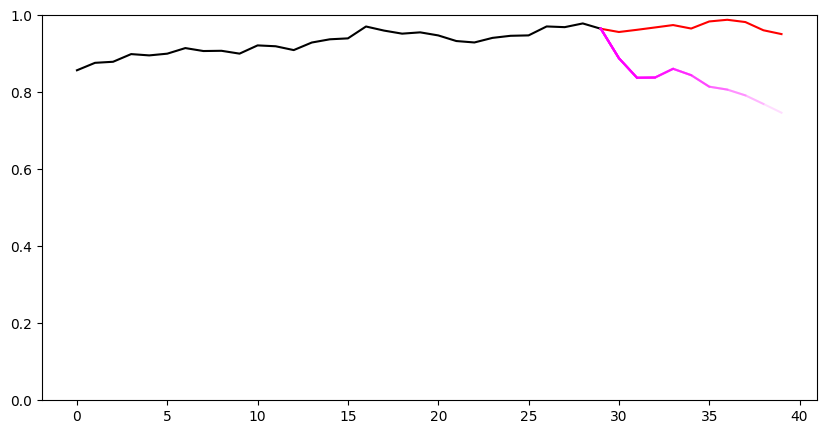

In [89]:
visualize_forecast(seq_to_test_pred_per_step, seq_to_test_truth)


In [141]:
seq_to_test_pred

tensor([[[0.120],
         [0.130],
         [0.139],
         [0.147],
         [0.155],
         [0.161],
         [0.166],
         [0.169],
         [0.173],
         [0.177]]])

In [135]:
seq_to_test_pred_per_step

[(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
  tensor([[[ 0.101,  0.114,  0.112,  0.140, -0.196, -0.303,  0.089,  0.040,
             0.066, -0.154, -0.114,  0.054, -0.005, -0.075],
           [ 0.115,  0.123,  0.125,  0.152,  0.585,  0.208, -0.063,  0.137,
            -0.152,  0.259,  0.022,  0.004,  0.069, -0.010],
           [ 0.113,  0.129,  0.125,  0.153,  0.130, -0.265, -0.101, -0.133,
             0.043, -0.088, -0.004,  0.120, -0.058, -0.127],
           [ 0.126,  0.151,  0.144,  0.175, -0.196, -0.303,  0.089,  0.040,
             0.066, -0.154, -0.114,  0.054, -0.005, -0.075],
           [ 0.122,  0.150,  0.146,  0.177,  0.119, -0.330, -0.112, -0.109,
             0.073, -0.078, -0.108,  0.127, -0.132, -0.157],
           [ 0.124,  0.135,  0.133,  0.157, -0.196, -0.303,  0.089,  0.040,
             0.066, -0.154, -0.114,  0.054, -0.005, -0.075],
           [ 0.132,  0.150,  0.149, 